# Santander Value Prediction Challenge

In this competition, Santander Group is asking Kagglers to help them identify the value of transactions for each potential customer. This is a first step that Santander needs to nail in order to personalize their services at scale.

## 1. Import Libraries

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## 2.Import dataset

In [2]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

print("Training Set:")
n_train_data=len(train_df)
n_train_features=train_df.shape[1]

print("Number of Records: {}".format(n_train_data))
print("Number of Features:{}".format(n_train_features))

print ("\nTesting set:")
n_test_data  = len(test_df)
n_test_features = test_df.shape[1]
print ("Number of Records: {}".format(n_test_data))
print ("Number of Features: {}".format(n_test_features))

Training Set:
Number of Records: 4459
Number of Features:4993

Testing set:
Number of Records: 49342
Number of Features: 4992


As we see in the data set, the training set have 4993 features (columns) but only have 445559 records (rows). Test set has 49342 records which is much more than the training set.

## 3.Understand the data

In [3]:
train_df.head(10)

,ID,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,000d6aaf2,38000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1,000fbd867,600000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2,0027d6b71,10000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3,0028cbf45,2000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4,002a68644,14400000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
5,002dbeb22,2800000.0,0.0,0,0.0,0,0,0,0,0,...,12000.0,5600000.0,20000000.0,0,0,0,0,0,0,11000
6,003925ac6,164000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,40000,0,0,0
7,003eb0261,600000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
8,004b92275,979000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,4000000.0,0,0,0,0,0,0,0
9,0067b4fef,460000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,400000


Here I list the top 10 rows of traning set, noticed that there are many zero values in the data and the columns' name are anonymized.

In [4]:
dtype_df = train_df.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,3147
1,float64,1845
2,object,1


Most columns in the data set are integer and float number but there is only one column which has object data. This column is the ID column which we is not useful for us.

### 3.1 Check null values

In [5]:
print("Total Train Features with NaN Values = " + str(train_df.columns[train_df.isnull().sum() != 0].size))
print("\nTotal Test Features with NaN Values = " + str(test_df.columns[test_df.isnull().sum() != 0].size))

Total Train Features with NaN Values = 0

Total Test Features with NaN Values = 0


There is no NaN values in both training and testing data.

### 3.2 Check columns with constant data


In [6]:
unique_df = train_df.nunique().reset_index()  ## check number of distinct observations in each column
unique_df.columns = ["col_name", "unique_count"]
constant_df = unique_df[unique_df["unique_count"]==1] ## if the number of distinct observation in each column is 1 then this column has constant value

In [7]:
constant_df.shape

(256, 2)

There are 256 columns have constant value so we can get ride of these columns

In [8]:
train_df.drop(constant_df.col_name.tolist(),axis=1,inplace=True) ## Drop 256 columns with constant values

In [9]:
train_df.shape

(4459, 4737)

### 3.3 Check and Remove Duplicate Columns

In [10]:
train_df=train_df.T.drop_duplicates().T

In [11]:
train_df.shape

(4459, 4732)

There are 6 duplicate columns and remove 5 of them

### 3.4 Split data into training and target data

In [17]:
X_train=train_df.drop(['ID','target'],axis=1)
y_train=np.log1p(train_df['target'].values.astype(int))

X_test = test_df.drop(constant_df.col_name.tolist() + ["ID"], axis=1)

## 4.Feature Selection


F:\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


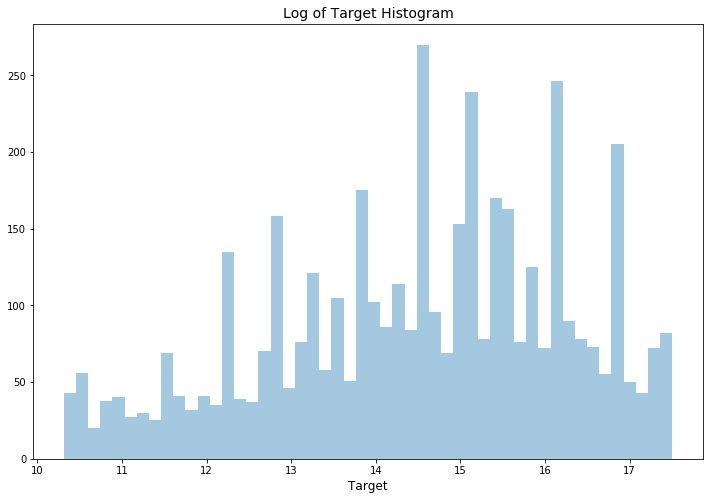

In [35]:
plt.figure(figsize=(12,8))
sns.distplot( y_train, bins=50, kde=False)
plt.xlabel('Target', fontsize=12)
plt.title("Log of Target Histogram", fontsize=14)
plt.show()